# Traffic Sign Classifier Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data


In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p' 
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


In [2]:

X_train = (X_train - 128.0) / 128.0
X_validation = (X_validation - 128.0) / 128.0
X_test = (X_test - 128.0) / 128.0
print(X_train[3])

#X_train = (X_train / 255.0) - 0.5
#X_validation = (X_validation / 255.0) - 0.5
#X_test = (X_test / 255.0) - 0.5
#print(X_train[3])

[[[-0.7578125 -0.78125   -0.796875 ]
  [-0.7734375 -0.796875  -0.8125   ]
  [-0.765625  -0.7890625 -0.796875 ]
  ..., 
  [-0.7421875 -0.7734375 -0.796875 ]
  [-0.734375  -0.7734375 -0.796875 ]
  [-0.71875   -0.7734375 -0.796875 ]]

 [[-0.765625  -0.78125   -0.8046875]
  [-0.765625  -0.7890625 -0.8125   ]
  [-0.765625  -0.796875  -0.8046875]
  ..., 
  [-0.734375  -0.765625  -0.7890625]
  [-0.7265625 -0.765625  -0.796875 ]
  [-0.71875   -0.765625  -0.796875 ]]

 [[-0.7734375 -0.7890625 -0.8046875]
  [-0.7734375 -0.796875  -0.8125   ]
  [-0.7734375 -0.8046875 -0.8125   ]
  ..., 
  [-0.7265625 -0.765625  -0.796875 ]
  [-0.71875   -0.765625  -0.7890625]
  [-0.7265625 -0.7734375 -0.8046875]]

 ..., 
 [[-0.765625  -0.796875  -0.828125 ]
  [-0.7734375 -0.796875  -0.8359375]
  [-0.7890625 -0.8046875 -0.828125 ]
  ..., 
  [-0.78125   -0.8203125 -0.828125 ]
  [-0.7890625 -0.8203125 -0.8359375]
  [-0.78125   -0.8203125 -0.8359375]]

 [[-0.7734375 -0.8046875 -0.828125 ]
  [-0.78125   -0.796875  -0.

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

18


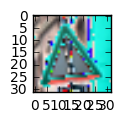

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [5]:
import tensorflow as tf

EPOCHS = 50 # 100
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
The [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. 

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    n_filt1 = 48 # 24 # 12 # 6    
    n_filt2 = 128 # 64 # 32 # 16
    n_fc1 = 120 # 1024 # 512 # 120
    n_fc2 = 84 # 512 # 256 # 84
    
    n_output = 43
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, n_filt1), mean = mu, stddev = sigma), name='conv1W')
    print(conv1_W)
    conv1_b = tf.Variable(tf.zeros(n_filt1))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, n_filt1, n_filt2), mean = mu, stddev = sigma), name='conv2W')
    conv2_b = tf.Variable(tf.zeros(n_filt2))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*n_filt2, n_fc1), mean = mu, stddev = sigma), name='FC1W')
    fc1_b = tf.Variable(tf.zeros(n_fc1))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(n_fc1, n_fc2), mean = mu, stddev = sigma), name='FC2W')
    fc2_b  = tf.Variable(tf.zeros(n_fc2))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(n_fc2, n_output), mean = mu, stddev = sigma), name='FC3W')
    fc3_b  = tf.Variable(tf.zeros(n_output))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    regularizer = tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)
    
    return (logits, regularizer)

In [7]:
from collections import namedtuple

Parameters = namedtuple('Parameters', [
        # Data parameters
        'num_classes', 'image_size', 
        # Training parameters
        'batch_size', 'max_epochs', 'log_epoch', 'print_epoch',
        # Optimisations
        'learning_rate_decay', 'learning_rate',
        'l2_reg_enabled', 'l2_lambda', 
        'early_stopping_enabled', 'early_stopping_patience', 
        'resume_training', 
        # Layers architecture
        'conv1_k', 'conv1_d', 'conv1_p', 
        'conv2_k', 'conv2_d', 'conv2_p', 
        'conv3_k', 'conv3_d', 'conv3_p', 
        'fc4_size', 'fc4_p'
    ])


is_training = tf.placeholder(tf.bool)


parameters = Parameters(
    # Data parameters
    num_classes = 43,
    image_size = (32, 32),
    # Training parameters
    batch_size = 256,
    max_epochs = 1001,
    log_epoch = 1,
    print_epoch = 1,
    # Optimisations
    learning_rate_decay = False,
    learning_rate = 0.0001,
    l2_reg_enabled = True,
    l2_lambda = 0.0001,
    early_stopping_enabled = True,
    early_stopping_patience = 100,
    resume_training = True,
    # Layers architecture
    conv1_k = 5, conv1_d = 32, conv1_p = 0.9,
    conv2_k = 5, conv2_d = 64, conv2_p = 0.8,
    conv3_k = 5, conv3_d = 128, conv3_p = 0.7,
    fc4_size = 1024, fc4_p = 0.5
)


def fully_connected(input, size):
    """
    Performs a single fully connected layer pass, e.g. returns `input * weights + bias`.
    """
    weights = tf.get_variable( 'weights', 
        shape = [input.get_shape()[1], size],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [size],
        initializer = tf.constant_initializer(0.0)
      )
    return tf.matmul(input, weights) + biases

def fully_connected_relu(input, size):
    return tf.nn.relu(fully_connected(input, size))

def conv_relu(input, kernel_size, depth):
    """
    Performs a single convolution layer pass.
    """
    weights = tf.get_variable( 'weights', 
        shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [depth],
        initializer = tf.constant_initializer(0.0)
      )
    conv = tf.nn.conv2d(input, weights,
        strides = [1, 1, 1, 1], padding = 'SAME')
    return tf.nn.relu(conv + biases)

def pool(input, size):
    """
    Performs a max pooling layer pass.
    """
    return tf.nn.max_pool(
        input, 
        ksize = [1, size, size, 1], 
        strides = [1, size, size, 1], 
        padding = 'SAME'
    )

def Sermanet(input, params, is_training):
    """
    Performs a full model pass.
    
    Parameters
    ----------
    input         : Tensor
                    NumPy array containing a batch of examples.
    params        : Parameters
                    Structure (`namedtuple`) containing model parameters.
    is_training   : Tensor of type tf.bool
                    Flag indicating if we are training or not (e.g. whether to use dropout).
                    
    Returns
    -------
    Tensor with predicted logits.
    """
    # Convolutions

    with tf.variable_scope('conv1'):
        conv1 = conv_relu(input, kernel_size = params.conv1_k, depth = params.conv1_d) 
    with tf.variable_scope('pool1'): 
        pool1 = pool(conv1, size = 2)
        pool1 = tf.cond(is_training, lambda: tf.nn.dropout(pool1, keep_prob = params.conv1_p), lambda: pool1)
    with tf.variable_scope('conv2'):
        conv2 = conv_relu(pool1, kernel_size = params.conv2_k, depth = params.conv2_d)
    with tf.variable_scope('pool2'):
        pool2 = pool(conv2, size = 2)
        pool2 = tf.cond(is_training, lambda: tf.nn.dropout(pool2, keep_prob = params.conv2_p), lambda: pool2)
    with tf.variable_scope('conv3'):
        conv3 = conv_relu(pool2, kernel_size = params.conv3_k, depth = params.conv3_d)
    with tf.variable_scope('pool3'):
        pool3 = pool(conv3, size = 2)
        pool3 = tf.cond(is_training, lambda: tf.nn.dropout(pool3, keep_prob = params.conv3_p), lambda: pool3)
    
    # Fully connected
    
    # 1st stage output
    pool1 = pool(pool1, size = 4)
    shape = pool1.get_shape().as_list()
    pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])
    
    # 2nd stage output
    pool2 = pool(pool2, size = 2)
    shape = pool2.get_shape().as_list()
    pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])    
    
    # 3rd stage output
    shape = pool3.get_shape().as_list()
    pool3 = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])
    
    flattened = tf.concat(1, [pool1, pool2, pool3])
    
    with tf.variable_scope('fc4'):
        fc4 = fully_connected_relu(flattened, size = params.fc4_size)
        fc4 = tf.cond(is_training, lambda: tf.nn.dropout(fc4, keep_prob = params.fc4_p), lambda: fc4)
    with tf.variable_scope('out'):
        logits = fully_connected(fc4, size = params.num_classes)
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [9]:
rate = 0.001
reg_rate = 1e-3 # 1e-4

logits, regularizer = LeNet(x, keep_prob)
#logits = Sermanet(x, parameters, is_training)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
#loss_operation = loss_operation + reg_rate * regularizer


optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("conv1W/read:0", shape=(5, 5, 3, 48), dtype=float32)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        #accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, is_training: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    best_accuracy = 0.0
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, is_training: True})
        
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))            
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        if (validation_accuracy > best_accuracy):
            saver.save(sess, './lenet')
            print("Model saved")
            best_accuracy = validation_accuracy


Training...

EPOCH 1 ...
Training Accuracy = 0.725
Validation Accuracy = 0.660

Model saved
EPOCH 2 ...
Training Accuracy = 0.913
Validation Accuracy = 0.864

Model saved
EPOCH 3 ...
Training Accuracy = 0.953
Validation Accuracy = 0.900

Model saved
EPOCH 4 ...
Training Accuracy = 0.970
Validation Accuracy = 0.934

Model saved
EPOCH 5 ...
Training Accuracy = 0.990
Validation Accuracy = 0.962

Model saved
EPOCH 6 ...
Training Accuracy = 0.991
Validation Accuracy = 0.955

EPOCH 7 ...
Training Accuracy = 0.995
Validation Accuracy = 0.966

Model saved
EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.955

EPOCH 9 ...
Training Accuracy = 0.994
Validation Accuracy = 0.962

EPOCH 10 ...
Training Accuracy = 0.997
Validation Accuracy = 0.960

EPOCH 11 ...
Training Accuracy = 0.998
Validation Accuracy = 0.969

Model saved
EPOCH 12 ...
Training Accuracy = 0.997
Validation Accuracy = 0.956

EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.965

EPOCH 14 ...
Training Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.965
